This notebook classify between very easy class and very hard class based on the puzzle description and comments.

## SVM

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/data.csv")

df.head()

,features,target,comments,has_tapa,has_nurimisaki,has_kompass,has_palindrome_(variante),has_anti-queen_(variante),has_10-in-9_(variante),has_modifier_cells_(variante),...,has_tomtom,has_statue_park,has_extra_regions_(variante),has_logical,has_norinori,has_anti-knight_(variante),has_daisho,has_earthquake_(variante),has_diagonal_(variante),has_cross_the_streams
0,plato feeling unwell hypochondriac thermometer...,3,added comment work solution code,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,friend roman countryman lend ear come bury cae...,4,added roman numeral tag,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,standard yinyang rule apply,2,tougher expected star difficult puzzle maybe f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,penpastandard sudoku rule apply final numerica...,3,fun puzzle requiring tremendously wonderful va...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,ring killerlittle killer sudoku wessel strijks...,3,smistry thanks glad liked thanks setting nice ...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
def prepare_df(df):

    df = df[(df['target'] != 2) & (df['target'] != 3) & (df['target'] != 4)]
    df['target'] = df['target'].replace({1: 0, 5: 1})

    return df

In [20]:
import scipy

df = prepare_df(df)

X = df['features']
y = df['target'] 

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

X_ngram_features = ngram_features.fit_transform(df['features'])
X_ngram_comments = ngram_comments.fit_transform(df['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

/tmp/ipykernel_14092/3593797695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({1: 0, 5: 1})


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class Weights: {class_weights_dict}")

Class Weights: {0: 0.8495934959349594, 1: 1.2151162790697674}


In [23]:
svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.91      0.90      0.90       246
        Hard       0.86      0.87      0.87       173

    accuracy                           0.89       419
   macro avg       0.88      0.89      0.88       419
weighted avg       0.89      0.89      0.89       419



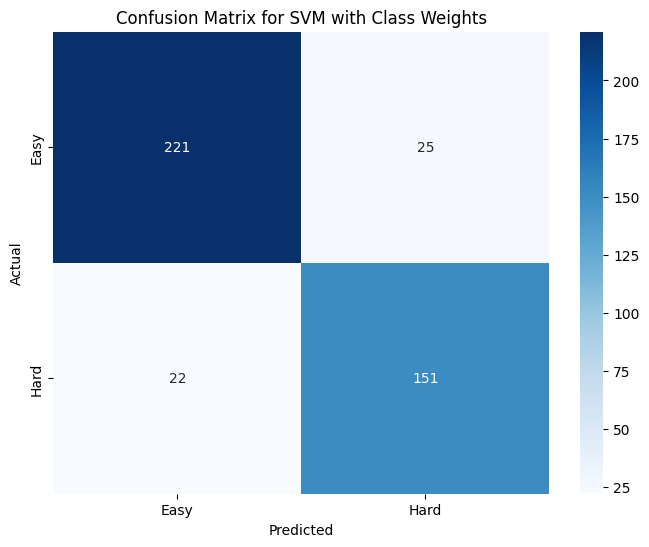

In [24]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights')
plt.show()

## Data augmentation

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from imblearn.over_sampling import SMOTE

In [30]:
df = pd.read_csv("../data/data.csv")

df = prepare_df(df)

X = df['features']
y = df['target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

ngram_features = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
ngram_comments = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

X_ngram_features = ngram_features.fit_transform(df['features'])
X_ngram_comments = ngram_comments.fit_transform(df['comments'].fillna(''))

X_combined = scipy.sparse.hstack([X_ngram_features, X_ngram_comments])

/tmp/ipykernel_14092/3938432117.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['target'].replace({1: 0, 5: 1})


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [34]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_smote), y=y_train_smote)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

print(f"Class Weights: {class_weights_dict}")

svm_classifier = SVC(kernel='rbf', class_weight=class_weights_dict, C=1.0, random_state=42)
svm_classifier.fit(X_train_smote, y_train_smote)

y_pred = svm_classifier.predict(X_test)

Classification Report:
               precision    recall  f1-score   support

        Easy       0.77      0.98      0.86       246
        Hard       0.96      0.57      0.72       173

    accuracy                           0.81       419
   macro avg       0.86      0.78      0.79       419
weighted avg       0.85      0.81      0.80       419



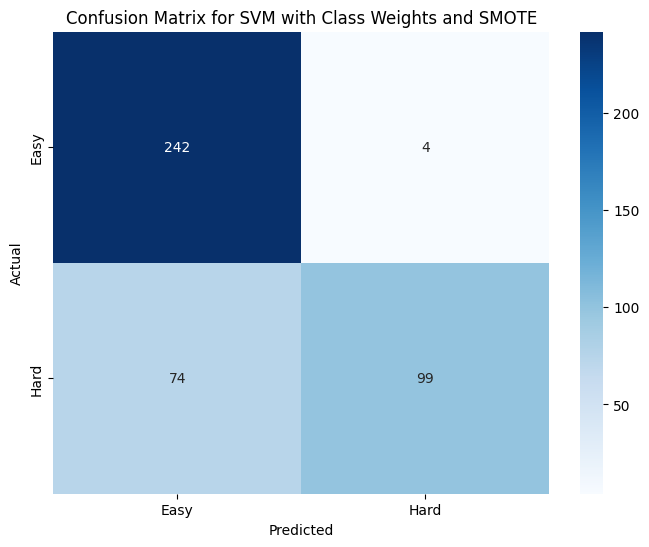

In [35]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Easy', 'Hard']))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Easy', 'Hard'], yticklabels=['Easy', 'Hard'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with Class Weights and SMOTE')
plt.show()